## Project Description
### Context
You are an analyst of a large online store. Together with the marketing department, you have prepared a list of hypotheses for increasing revenue.
Prioritize hypotheses, run an A/B test and analyze the results.

### Part 1. Prioritization of hypotheses.
The file /datasets/hypothesis.csv contains 9 hypotheses to increase the revenue of an online store with the specified parameters Reach, Impact, Confidence, Effort.

Task
* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Use the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Indicate how the prioritization of hypotheses has changed when using RICE instead of ICE. Explain why this happened.

####
Data description Data for the first part

File /datasets/hypothesis.csv
* Hypothesis — a brief description of the hypothesis;
* Reach — user coverage on a 10-point scale;
* Impact — impact on users on a 10-point scale;
* Confidence — confidence in the hypothesis on a 10-point scale;
* Efforts — the cost of resources to test the hypothesis on a 10-point scale. The greater the value of Efforts, the more expensive hypothesis testing is.

In [43]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [44]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net//datasets/hypothesis.csv')

In [45]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [46]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


There are no gaps in the data, the fields have the correct data types

In [47]:
hypothesis.duplicated().sum() # no obvius duplicates

0

In [48]:
hypothesis.columns = hypothesis.columns.str.lower() # столбцы в нижний регистр
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8


In [49]:

pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [50]:
hypothesis['ice_score'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice_score'] = hypothesis['ice_score'].round(1) 
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)


,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


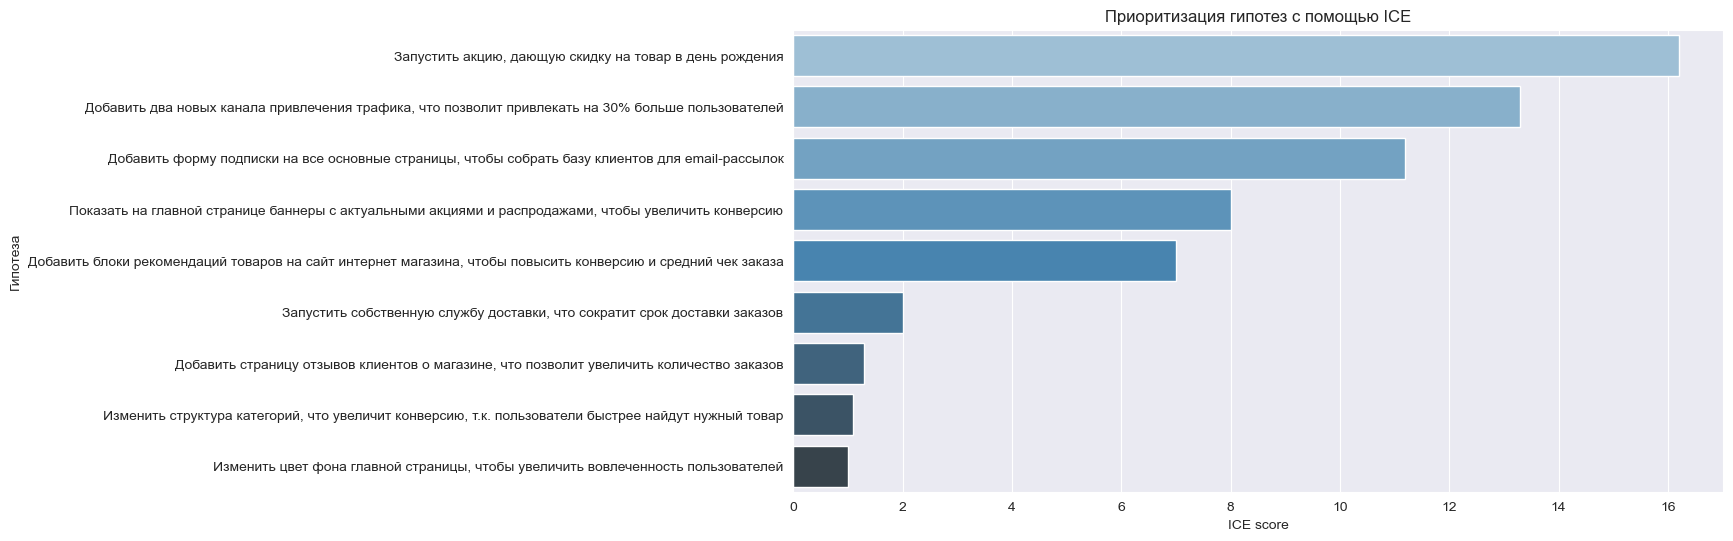

In [51]:
sns.set_style("darkgrid")

hypothesis_plot = hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Приоритизация гипотез с помощью ICE')
sns.barplot(x='ice_score', y='hypothesis', data=hypothesis_plot, palette='Blues_d')
plt.xlabel('ICE score')
plt.ylabel('Гипотеза')
plt.show()

We checked the prioritization of hypotheses according to the ICE framework. The first three places:

1. Launch a promotion giving a discount on a product on your birthday	
2. Add two new traffic channels, which will attract 30% more users
3. Add a subscription form to all the main pages to collect a customer base for email newsletters	

 Next, we will add Reach (how many users will be affected by the change we want to make) and look at the changes if there are any.

In [52]:
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


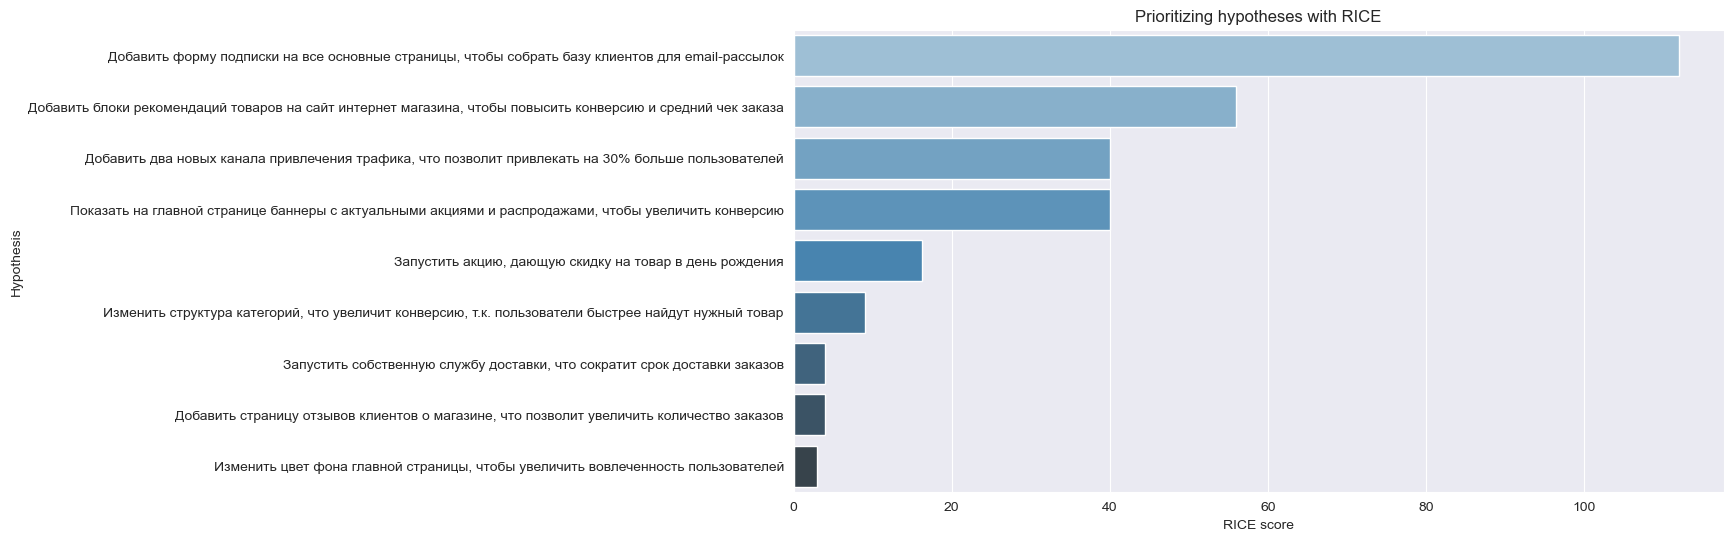

In [53]:
sns.set_style("darkgrid")

hypothesis_plot = hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Prioritizing hypotheses with RICE')
sns.barplot(x='rice_score', y='hypothesis', data=hypothesis_plot, palette='Blues_d')
plt.xlabel('RICE score')
plt.ylabel('Hypothesis')
plt.show()

The analysis on the RICE framework gave different results in comparison with the analysis on the ICE framework. In RICE, the first three places were taken by hypotheses: 
1. Add a subscription form to all the main pages to collect a customer base for email newsletters
2. Add product recommendation blocks to the online store's website to increase conversion and average order receipt
3. Add two new traffic channels, which will attract 30% more users

Interestingly, the hypothesis "Add a subscription form to all the main pages to collect a customer base for email newsletters" and "Add two new traffic channels that will attract 30% more users" turned out to be in the top 3 for both RICE and ICE. However, in the RICE framework, the hypothesis "Add a subscription form to all the main pages to collect a customer base for email newsletters" was prioritized over the hypotheses "Add product recommendation blocks to the online store's website to increase conversion and average order receipt" and "Add two new traffic channels that will attract 30% more users".

This happened because the RICE framework, unlike ICE, takes into account not only the importance of the hypothesis and confidence in its success, but also the reach of users who will be affected by the change. Thus, the hypothesis with index 2, which suggests adding a subscription form to all the main pages in order to collect a customer base for email newsletters, has a greater coverage than the hypotheses with indexes 7 and 0. Therefore, the hypothesis with index 7 has become a higher priority in the RICE framework.

### Part 2. Analysis of the A/B test
Task

Analyze the A/B test:

1. Plot the cumulative revenue by group. Make conclusions and assumptions.
2. Plot the cumulative average check by groups. Make conclusions and assumptions.
3. Plot the relative change in the cumulative average check of group B to group A. Make conclusions and assumptions.
4. Plot the cumulative average number of orders per visitor by groups. Make conclusions and assumptions.
5. Plot the relative change in the cumulative average number of orders per visitor of group B to group A. Make conclusions and assumptions.
6. Build a dot graph of the number of orders by users. Make conclusions and assumptions.
7. Calculate the 95th and 99th percentiles of the number of orders per user. Select a border to identify abnormal users.
8. Build a dot graph of the cost of orders. Make conclusions and assumptions.
9. Calculate the 95th and 99th percentiles of the cost of orders. Select a boundary to identify abnormal orders.
10. Calculate the statistical significance of differences in the average number of orders per visitor between groups based on "raw" data. Make conclusions and assumptions.
11. Calculate the statistical significance of differences in the average order receipt between groups based on "raw" data. Make conclusions and assumptions.
12. Calculate the statistical significance of the differences in the average number of orders per visitor between the groups according to the "cleared" data. Make conclusions and assumptions.
13. Calculate the statistical significance of the differences in the average order receipt between the groups according to the "cleared" data. Make conclusions and assumptions.
14. Make a decision based on the test results and explain it. Solutions:
* Stop the test, fix the victory of one of the groups.
  * Stop the test, fix the absence of differences between groups.
  * Continue the test.

#### Data Description

Data for the second part

File /datasets/orders.csv
* TransactionID — order ID;
* visitorID — ID of the user who made the order;
* date — the date when the order was made;
* revenue — order revenue;
* group — the A/B test group that the order fell into.

File /datasets/visitors.csv
* date — date;
* group — A/B test group;
* visitors — the number of users on the specified date in the specified A/B test group

In [54]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')

In [55]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [56]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [57]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Users are divided into two unequal groups A-557 people, B - 640 people, which is almost 15% more.

There are no gaps in the data, the date field has the object type and column names of lowercase and uppercase letters. This needs to change.

In [58]:
orders.columns = (orders.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()) 
orders['date'] = orders['date'].apply(pd.to_datetime)# type to datetime
orders.sample()

,transaction_id,visitor_id,date,revenue,group
860,1369044083,1826431635,2019-08-30,8885,B


In [59]:
orders.duplicated().sum() # no obvious duplicates

0

In [60]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [61]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [62]:
visitors['date'] = visitors['date'].apply(pd.to_datetime) 

In [63]:
visitors.duplicated().sum() #no obvious duplicates

0

Columns to snake_case and columns with dates to datetime. Checked for obvious duplicates

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


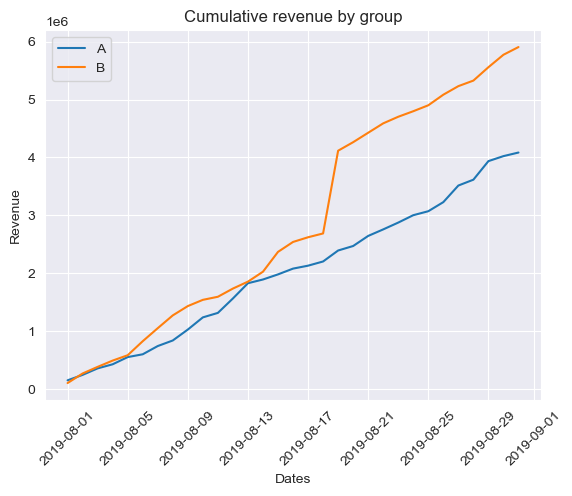

In [64]:
# create an array of unique pairs of date values and test groups
dates_groups = orders[['date','group']].drop_duplicates()

# get aggregated cumulative data on orders by day
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({ 'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by =['date','group'])

# we get aggregated cumulative data about online store visitors by day
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({ 'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# combine cumulative data in one table and assign clear names to its columns
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

# Split the table into two by test group
# dataframe with the cumulative number of orders and cumulative revenue by day in group A
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# dataframe with the cumulative number of orders and cumulative revenue by day in group B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# We are building a revenue graph for group A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# We are building a revenue graph for group B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Cumulative revenue by group')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.xticks(rotation=45) # rotate labels by 45 degrees
plt.legend()
plt.show()

The graph shows that group A demonstrates linear progressive growth from the beginning to the end of observations. Group B also begins its journey with a similar growth in the first five days of August, then there is a slight slowdown in growth, but already on August 18 there is a sharp jump.

However, when analyzing the chart, it should be taken into account that it shows revenue growth, which may be due to a change in the average receipt or conversion. Therefore, it is possible that this graph behavior can be caused by several factors, and it is necessary to analyze each of them.

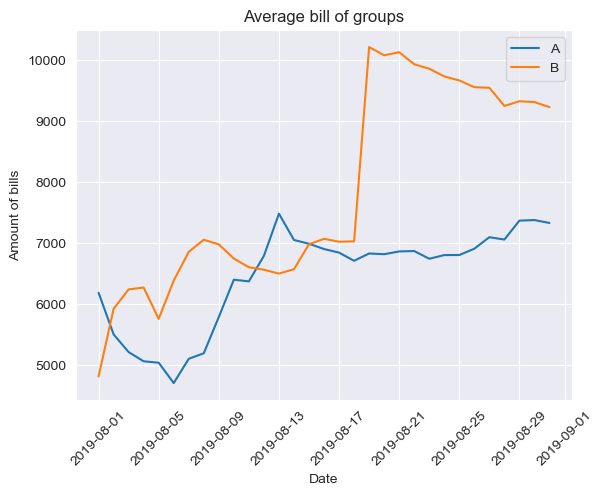

In [65]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Average bill of groups')
plt.xlabel('Date')
plt.ylabel('Amount of bills')
plt.xticks(rotation= 45) # turn on 45 degrees 
plt.legend()
plt.show()

Group A the average check falls within 5 days, then begins to grow by August 13, reaches a peak, corrects and stabilizes until the end of observations.
Group B check is growing with regular adjustments, a sharp rise on August 18 and then there is a slow decrease in the average check and at the end of observations it is still significantly higher than that of group A.

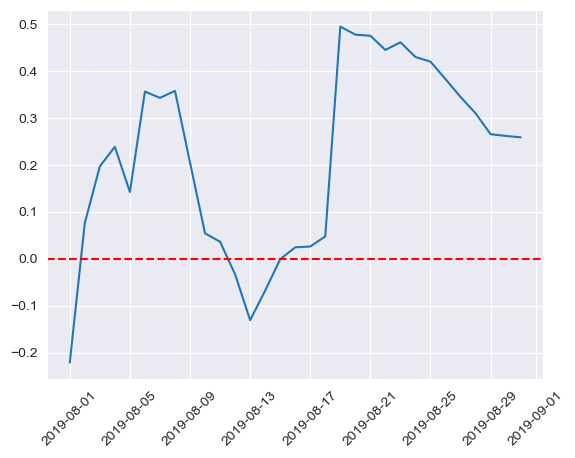

In [66]:
# collect data in one dataframe
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# build the ratio of average checks
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB']) /
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.xticks(rotation=45) # rotate labels by 45 degrees


# add X axis
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

We see the same thing by the ratio of average checks, for the entire observation, the average check of group B was lower than group A for 4 days. The rest of the time he went out.

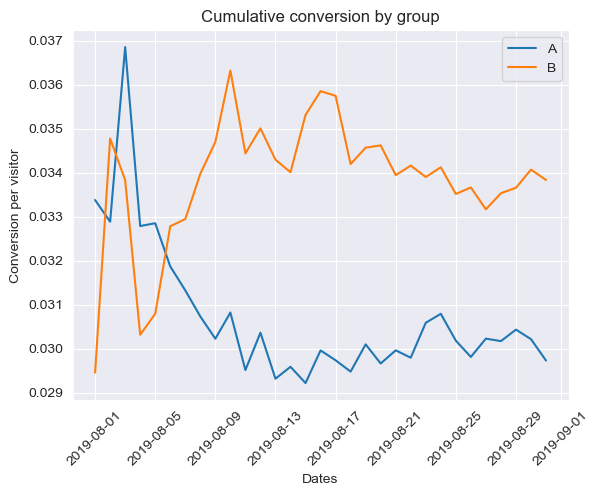

In [67]:
# We get the cumulative number of orders per visitor by day and group
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# separate data for group A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# separate data for group B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']


plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('Cumulative conversion by group')
plt.xlabel('Dates')
plt.ylabel('Conversion per visitor')
plt.xticks(rotation=45)
plt.legend()
plt.show()

At the beginning of the test, the cumulative conversion by groups had high fluctuations in both group A and group B and was higher in group A, then there was a decline in both groups, group B began to grow, stabilized and was steadily higher than group A. Group A stabilized after the fall, but its results were lower than group B.
The conversion rate is also higher for group B. (but users are also 15% higher)

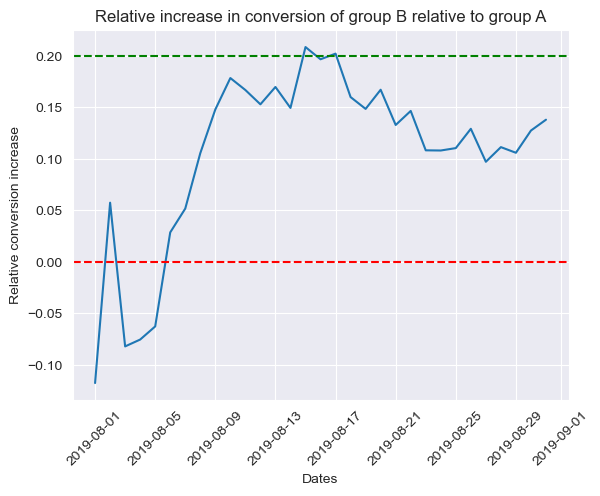

In [68]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],
                                                     left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'],
          merged_cumulative_conversions['conversionB'] /
          merged_cumulative_conversions['conversionA']-1,
          label="Relative increase in conversion of group B relative to group A")


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y= 0.2, color='green', linestyle='--')

plt.title('Relative increase in conversion of group B relative to group A')
plt.xlabel('Dates')
plt.ylabel('Relative conversion increase')
plt.xticks(rotation=45)
plt.show()

At the beginning of the test, Group B performed worse than Group A, but then it outperformed Group A, and its conversion rate began to grow rapidly. In the future, there was a slow decline in the conversion rate in group B, but now the conversion rate has started to grow again.

In [69]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns =  ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

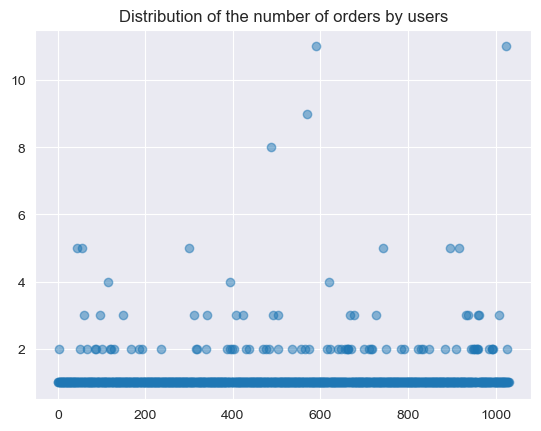

In [70]:
# construct a scatter plot
plt.scatter(x_values, orders_by_users['orders'],alpha=0.5)
plt.title('Distribution of the number of orders by users')
plt.show()

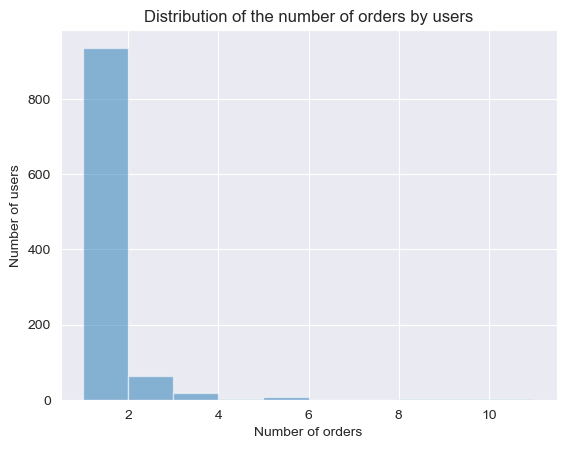

In [71]:
# construct a histogram
plt.hist(orders_by_users['orders'], alpha=0.5)
plt.title('Distribution of the number of orders by users')
plt.xlabel('Number of orders')
plt.ylabel('Number of users')
plt.show()

In [72]:
orders_by_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Most users placed an order once, but there are also those who managed to make eight to eleven orders in a month.

In [73]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Conclusion: 
No more than 5% of users made more than 2 purchases during testing. And only 1% is more than four.
Let's take 4 orders per user as the upper bound.

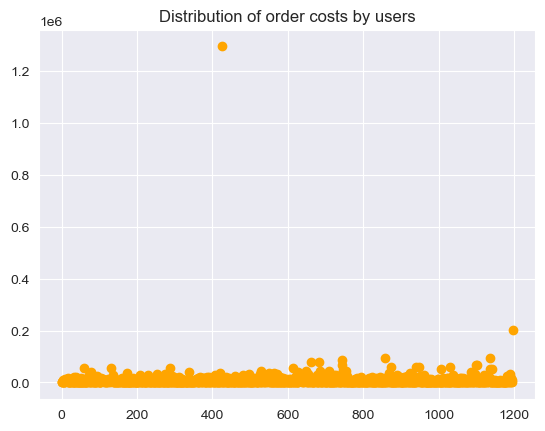

In [74]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# create a scatter plot
plt.scatter(x_values, orders['revenue'], color='orange')
plt.title('Distribution of order costs by users')
plt.show()

We see an outlier for a decent amount. Which can distort the analysis.

In [75]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Chart without emissions.

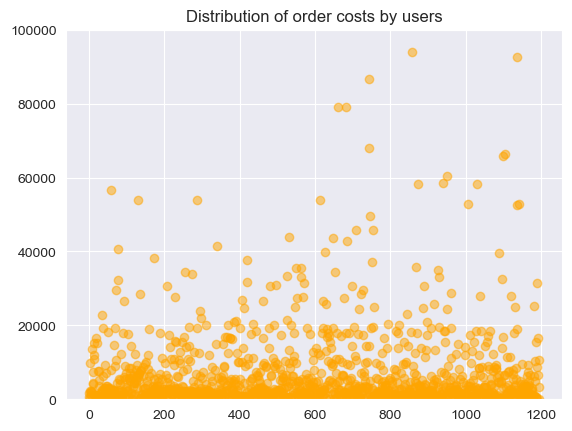

In [76]:
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue'], alpha=0.5, color='orange')
plt.title('Distribution of order costs by users')
plt.show()

The main part located to 20000.

We consider the 95th and 99th percentiles of the cost of orders per user.

In [77]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


The value of 95% percentile is 28000, 99% percentile is 58233.

In [78]:
# create a dataframe with the daily number of visitors to group A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# create a dataframe with the cumulative number of visitors to group A for each date
visitors_a_cummulative = visitors_a_daily.apply(
     lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
         {'date': 'max', 'visitors_per_date_a': 'sum'}
     ),
     axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# create a dataframe with the daily number of visitors to group B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# create a dataframe with the cumulative number of visitors of group B for each date
visitors_b_cummulative = visitors_b_daily.apply(
     lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
         {'date': 'max', 'visitors_per_date_b': 'sum'}
     ),
     axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# create a dataframe with the daily number of orders and revenue of group A
orders_a_daily = (
     orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
     .groupby('date', as_index=False)
     .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# create a dataframe with the cumulative number of orders and revenue of group A for each date
orders_a_cummulative = orders_a_daily.apply(
     lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
         {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
     ),
     axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
     'date',
     'orders_cummulative_a',
     'revenue_cummulative_a',
]

# create a dataframe with the daily number of orders and revenue of group B
orders_b_daily = (
     orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
     .groupby('date', as_index=False)
     .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# create a dataframe with the cumulative number of orders and revenue of group B for each date
orders_b_cummulative = orders_b_daily.apply(
     lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
         {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
     ),
     axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
     'date',
     'orders_cummulative_b',
     'revenue_cummulative_b',
]


# Connecting frames
data = (
     orders_a_daily.merge(
         orders_b_daily, left_on='date', right_on='date', how='left'
     )
     .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
     .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
     .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
     .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
     .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
     .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head())

        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01                 24              148579                 21   
1 2019-08-02                 20               93822                 24   
2 2019-08-03                 24              112473                 16   
3 2019-08-04                 16               70825                 17   
4 2019-08-05                 25              124218                 23   

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0              101217                    24                 148579   
1              165531                    44                 242401   
2              114248                    68                 354874   
3              108571                    84                 425699   
4               92428                   109                 549917   

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0                    21                 101217                 

Data column names:
* date — date;
* orders_per_date_a — the number of orders on the selected date in group A;
* revenue_per_date_a — total revenue on the selected date in group A;
* orders_per_date_b — the number of orders on the selected date in group B;
* revenue_per_date_b — total revenue on the selected date in group B;
* order_cummulative_a — the total number of orders up to and including the selected date in group A;
* revenue_cummulative_a — total revenue up to and including the selected date in group A;
* order_cummulative_b — the total number of orders up to and including the selected date in group B;
* revenue_cummulative_b — total revenue up to and including the selected date in group B;
* visitors_per_date_a — the number of users on the selected date in group A;
* visitors_per_date_b — the number of users on the selected date in group B;
* visitors_cummulative_a — the number of users up to and including the selected date in group A;
* visitors_cummulative_b — the number of users up to and including the selected date in group B.

Let's calculate the statistical significance of the difference in the average number of orders between the groups.

Let 's formulate hypotheses:

* H0 :There are no statistically significant differences in conversion between the groups
* H1 : There are statistically significant differences in conversion between the groups

For testing, we will use the Mann-Whitney criterion, the level of statistical significance will take the value 0.05

In [79]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value for raw data conversion: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Relative increase in conversion of group B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value for raw data conversion: 0.017
Relative increase in conversion of group B: 0.138


Conclusion:
Based on the "raw" data, we reject the H0 hypothesis that there are no differences in conversion between the groups, since the p-value is 0.017, which is less than the level of statistical significance. The relative difference in conversion between the groups was 13.8%, that is, the conversion rate of group B is higher than that of group A. Therefore, it can be assumed that a feature was implemented in group B that had a positive effect on conversion.

Let 's formulate hypotheses:

* H0: There are no statistically significant differences in the average order receipt between the groups.
* H1: There are statistically significant differences between the groups in the average order receipt.

The Mann-Whitney test with a statistical significance level of 0.05 is used to test hypotheses.

In [80]:
print('P-value for the average receipt before data clearing:{0:.3f}'
        .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
        orders[orders['group']=='B']['revenue'])[1]))
print('Relative increase in the average check of group B to A according to raw data:{0:.3f}'
        .format(orders[orders['group']=='B']['revenue'].mean() /
         orders[orders['group']=='A']['revenue'].mean()-1))

P-value for the average receipt before data clearing:0.729
Relative increase in the average check of group B to A according to raw data:0.259


According to the "raw" data, the p-value is 0.729, which is significantly higher than the level of statistical significance. Therefore, we do not reject the hypothesis that there are no differences in the amount of the average check between the groups. However, the relative difference in the amount of the average check between the groups was 25.9%, which suggests that the amount of the average check of group B is much larger than in group A. Perhaps the reason for this difference is in emissions.

So, based on the "raw" data, we cannot make an unambiguous conclusion about the presence of differences in the average check between the groups.

The 95th and 99th percentiles of the average checks are equal to 28_000 and 58_233 rubles. And the 95th and 99th percentiles of the number of orders per user are 2 and 4 orders per user.
We will take for abnormal users those who have made from 4 orders or made an order more expensive than 45,000 rubles. So we will remove 1% of users with the largest number of orders and from 1% to 5% of users with expensive orders. Let's make slices of users with more than 4 orders — users_with_many_orders and users who have made orders more expensive than 45_000 — users_with_expensive_orders. Let's combine them in the abnormal_users table. 
Let's find out how many abnormal users there are with the shape attribute.

In [81]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 4]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 4]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 45000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
1137    759473111
949     887908475
744     888512513
709     950626008
dtype: int64
24


There are 24 abnormal users in total. 
Let's find out how their actions affected the test results. Let's calculate the statistical significance of the differences in the average number of orders between the test groups based on the cleared data. First, we will prepare samples of the number of orders by users by test groups:

In [82]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [83]:
print('P-value of conversion on cleaned data {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Relative increase in conversion of group B:{0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean()-1))

P-value of conversion on cleaned data 0.011
Relative increase in conversion of group B:0.163


Conclusion:
Based on the "purified" data, we reject the H0 hypothesis that there are no differences in conversion between the groups, since the p-value is 0.011 (a slight decrease to the raw data), which is less than the level of statistical significance. The relative difference in conversion between the groups was 16.3% (the difference in conversion increased by 2.5%), that is, the conversion of group B is higher than that of group A.

In [84]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.667
0.049


Conclusion:
The P-value is 0.667, which indicates that the null hypothesis about the equality of the average check in both groups could not be rejected. Thus, there is no sufficient reason to consider the groups different by the average check. The relative increase in A to A is 0.049, which means that there are practically no differences between the groups on the average check.

### Conclusion:

Based on the data provided by the online store, studies were conducted and recommendations were formulated:

By prioritizing hypotheses, you should pay attention to hypotheses: 

1. "Launch a promotion giving a discount on a product on your birthday" 
2. "Add two new traffic channels, which will attract 30% more users"
3. "Add a subscription form to all the main pages to collect a customer base for email newsletters." 

If user coverage is included in the ranking of hypotheses, it is recommended to follow the order: 

1. "Add a subscription form to all the main pages to collect a customer base for email newsletters"
2. "Add product recommendation blocks to the online store's website to increase conversion and average order receipt"
3. "Add two new traffic channels, which will attract 30% more users."

Regarding the analysis of A/B test:

* There is a statistically significant difference in conversion between groups, both for "raw" data and for data after filtering anomalies. 
* The conversion rate in Group B is higher than in Group A by 14-15%.
* There is no statistically significant difference in the average check between the groups either for "raw" data or for data after filtering anomalies. However, the average check in Group B is higher.
The graph of changes in the cumulative conversion of group B to group A shows a stable superiority of the results of group B.
Based on the results obtained, it is recommended to stop the test and record the victory of group B, since its conversion rate is significantly higher than that of group A.